In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helita.sim import rh15d

In [2]:
!pwd
dpath = '/mn/stornext/u3/souvikb/rh/rh15d/run_example/output/'

/mn/stornext/u3/souvikb/rh/rh15d/run_example


In [3]:
data = rh15d.Rh15dout(dpath)
wave = data.ray.wavelength

--- Read /mn/stornext/u3/souvikb/rh/rh15d/run_example/output/output_aux.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh/rh15d/run_example/output/output_indata.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh/rh15d/run_example/output/output_ray.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


In [4]:
indices = np.arange(len(wave))[(wave > 392.8) & (wave < 394.0)]


In [5]:
wave.sel(wavelength=500, method='nearest')

<xarray.DataArray 'wavelength' ()>
array(499.860431)
Coordinates:
    wavelength  float64 499.9
Attributes:
    units:    nm

In [6]:
index500 = np.argmin(np.abs(wave.data - 500))

In [7]:
f = open('ray.input', 'w')  # this will overwrite any existing file!
f.write('1.00\n')
output = str(len(indices) + 1)
for ind in indices:
    output += ' %i' % ind
output += ' %i\n' % index500 
f.write(output)
f.close()

In [7]:
from scipy import integrate

In [39]:
height = data.atmos.height_scale[0, 0].dropna('height')  # first column
index500 = np.argmin(np.abs(data.ray.wavelength_selected - 500))  # index of 500 nm
tau500 = integrate.cumtrapz(data.ray.chi[0, 0, :, index500].dropna('height'), x=-height)
tau500 = np.concatenate([[1e-20], tau500])  # ensure tau500 and height have same size

## Plot of optical depth vs. height

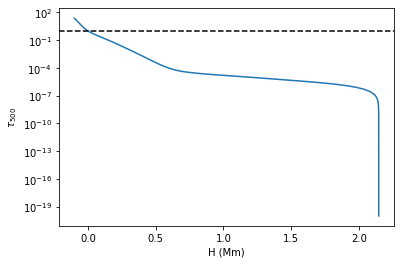

In [40]:
fig, ax = plt.subplots()
ax.plot(height / 1e6, tau500)  # height in Mm
ax.set_xlabel('H (Mm)')
ax.set_ylabel(r'$\tau$$_{500}$')
ax.set_yscale('log')
ax.axhline(y=1,linestyle='dashed',color='black')

In [15]:
data.atmos.height_scale[0, 0].shape

(82,)

In [21]:
indices.shape

(43,)

In [61]:
plt.plot(wave[indices],data.ray.intensity[0,0,indices])
plt.title(r'Ca II K')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Ca II K')

## So what about the optical depth at the line core? i.e. at 3933.67 A? 

In [24]:
##----Your code here----




## Departure coefficients

In [18]:
data.atom_CA

<xarray.Dataset>
Dimensions:          (continuum: 5, height: 82, level: 6, line: 5, x: 1, y: 1)
Coordinates:
  * x                (x) float64 0.0
  * y                (y) float64 0.0
Dimensions without coordinates: continuum, height, level, line
Data variables:
    Cij_line         (line, x, y, height) float32 ...
    Cji_line         (line, x, y, height) float32 ...
    Rij_continuum    (continuum, x, y, height) float32 ...
    Rij_line         (line, x, y, height) float32 ...
    Rji_continuum    (continuum, x, y, height) float32 ...
    Rji_line         (line, x, y, height) float32 ...
    populations      (level, x, y, height) float32 ...
    populations_LTE  (level, x, y, height) float32 ...
Attributes:
    nlevel:      6
    nline:       5
    ncontinuum:  5

Text(0, 0.5, 'Log (b$_{i}$)')

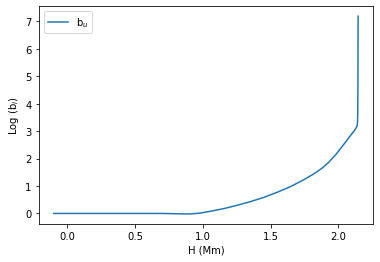

In [57]:
#plt.plot(data.atmos.height_scale[0, 0].dropna('height')/1e6, data.atom_CA.populations[0,0,0,:].dropna('height')/data.atom_CA.populations_LTE[0,0,0,:].dropna('height'),label=r'b$_{l}$')
plt.plot(data.atmos.height_scale[0, 0].dropna('height')/1e6, np.log10(data.atom_CA.populations[0,0,0,:].dropna('height')/data.atom_CA.populations_LTE[0,0,0,:].dropna('height')),label=r'b$_{u}$')
plt.legend(loc='best')
plt.xlabel('H (Mm)')
plt.ylabel(r'Log (b$_{i}$)')
#plt.xlim([0,2])

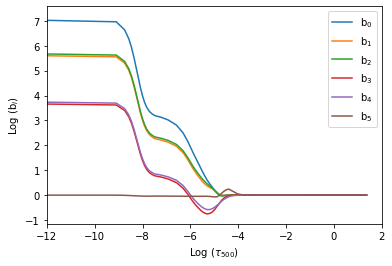

In [59]:
for i in range(6):
    plt.plot(np.log10(tau500), np.log10(data.atom_CA.populations[i,0,0,:].dropna('height')/data.atom_CA.populations_LTE[i,0,0,:].dropna('height')),label=r'b'+r'$_{'+str(i)+'}$')
    plt.legend(loc='best')
    plt.xlabel(r'Log ($\tau$$_{500}$)')
    plt.ylabel(r'Log (b$_{i}$)')
    plt.xlim([-12,2])
#plt.yscale('log')
#plt.xscale('log')

## Tau =1 height 

Text(0, 0.5, 'Height (Mm)')

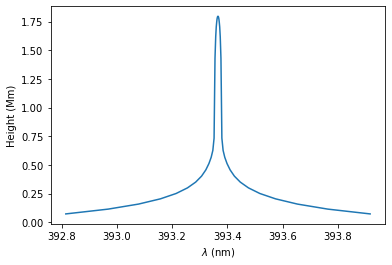

In [55]:
plt.plot(wave[indices],data.ray.tau_one_height[0,0,indices]/1e6)
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('Height (Mm)')